In [106]:
import pandas as pd

## Criar dataFrames com base nos datasets

In [6]:
# carregar dataframe de clientes (customers)
df_customers = pd.read_csv('./datasets_aula/churn_customers.csv')

In [7]:
# Mostrar os 5 primeiros registros do datafram
df_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
# Mostrar ultimos registros
df_customers.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [9]:
# schema do dataframe
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
# carregar dataframe de serviços (services)
df_services = pd.read_csv('./datasets_aula/churn_services.csv')

In [13]:
# carregar dataframe de contratos (contracts))
df_contracts = pd.read_csv('./datasets_aula/churn_contracts.csv')

In [ ]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


### Transformação de dados

In [17]:
# Transformar coluna totalCharges de string para floeat - Abordagem 1 com astype
df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)

In [ ]:
# Transformar coluna totalCharges de string para floeat - Abordagem to numeric com coerce(transformando linhas vazias em numeros nulos)
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')

In [18]:
# mostrar estrutura
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


Após a transformação da coluna totalcharges do dataframe contracts a coluna passou a ter 11 valores nulos


### Renomear colunas

In [20]:
# renomear coluna usando renam e dicionario
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

,customerID,gender,Above65yo,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [21]:
# Aplicar o resultado do rename no proprio dataframe
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)

In [22]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [23]:
# rename usando lista modificar todos os nomes de colunas
df_customers.columns = 'IDCliente', 'Genero', 'Mais65anos', 'TemParceiro', 'TemDependentes'

In [24]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65anos      7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Unificar dataframe

In [25]:
# contar quantidade de registros por dataframe
len(df_customers)

7043

In [31]:
# renomear colunas
df_services.rename(columns={'customerID': 'IDCliente' }, inplace=True)

In [30]:
df_contracts.rename(columns={'customerID': 'IDCliente' }, inplace=True)

In [29]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [32]:
#Unificar customer e services e criar outro
df_temp = df_customers.merge(df_services, on=['IDCliente'])

In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   Genero            7043 non-null   object
 2   Mais65anos        7043 non-null   int64 
 3   TemParceiro       7043 non-null   object
 4   TemDependentes    7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 770.5+ KB


In [34]:
df_churn_temp = df_temp.merge(df_contracts, on=['IDCliente'])

In [35]:
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Como lidar com dados ausentes

In [37]:
# detectar valores ausentes em todas as colunas em um dataframe
df_churn_temp.isna().sum()

IDCliente            0
Genero               0
Mais65anos           0
TemParceiro          0
TemDependentes       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
# detectar em coluna especifica
df_churn_temp.TotalCharges.isna().sum()

np.int64(11)

In [39]:
# Quantas linhas tem pelo menos uma coluna com valor ausente
df_churn_temp[df_churn_temp.isna().any(axis=1)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [40]:
# Quantas colunas tem pelo menos 1 valor ausente
df_churn_temp.isna().any(axis=0).sum()

np.int64(1)

### Lidando com valores ausentes

In [41]:
# remover de forma direta e especifica a coluna que possui valores ausentes
df_churn_temp.drop(columns=['TotalCharges'], axis=1)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [42]:
# remover colunas com valores ausentes
df_churn_temp.dropna(axis=1)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [43]:
#remover linhas com espaço vazio
df_churn_temp.dropna(axis=0)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Imputação de valores ausentes

In [44]:
#preencher com 0 dados vazios
df_churn_temp.fillna(0)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [45]:
# preencher valores padrao conforme coluna
df_churn_temp.fillna(value={'TotalCharges': 0, 'Genero': 'Não declarado'})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Análise Univariada

- Faixa etária do cliente tem uma forte associação com o churn
- Um cliente com menos de 6 meses de contrato é mais propenso a churn
- Cliente com contrato mensal é mais propenso ao churns


In [47]:
# contar clientes usando a variavel churn como referencia
df_churn_temp.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [49]:
# como é a distribuição de clientes percentualmente dalando que abandonaram ou continuam ativos
df_churn_temp.Churn.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

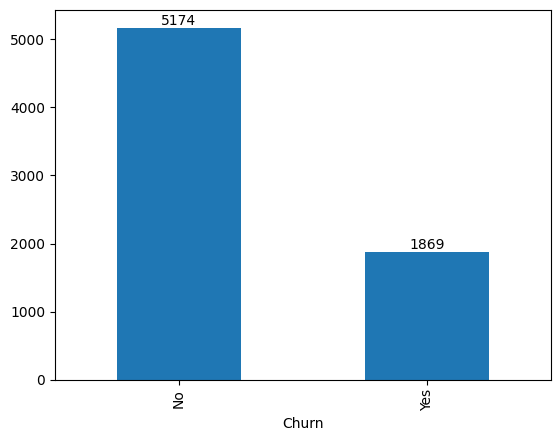

In [53]:
# plot distribuição churn (quantidade)
ax =df_churn_temp.Churn.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [54]:
# quais sao os tipos de contratos
df_churn_temp.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

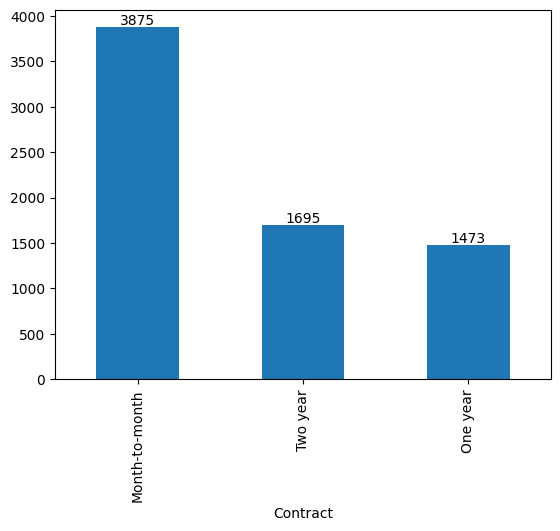

In [55]:
ax =df_churn_temp.Contract.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

### Filtros

In [ ]:
# Quantos clientes possuem 1 mês de contrato
len(df_churn_temp[(df_churn_temp.tenure==1)])

613

In [59]:
# representar percentual
len(df_churn_temp[(df_churn_temp.tenure==1)]) /len(df_churn_temp) *100

8.70367741019452

In [ ]:
#Quantos clientes possuem entre 1 e 6 meses de contrato
len(df_churn_temp[(df_churn_temp.tenure>=1) & (df_churn_temp.tenure<=6)])

1470

### Análise Bivariada

In [68]:
# Hipotese: clientes com contrato do tipo mensal são mais propensos ao churn
# construir tabela de contigencia entre tipo de contrato e churn

pd.crosstab(df_churn_temp.Churn, df_churn_temp.Contract, margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


In [69]:
# Hipotese: clientes com contrato do tipo mensal são mais propensos ao churn
# construir tabela de contigencia entre tipo de contrato e churn - proporção

pd.crosstab(df_churn_temp.Churn, df_churn_temp.Contract, margins=True, normalize=True, margins_name='Total')

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,0.315207,0.185574,0.233849,0.73463
Yes,0.234985,0.023570,0.006815,0.26537
Total,0.550192,0.209144,0.240664,1.00000


In [ ]:
# avaliar correlação entre duas variáveis categóricas (qualitativas)
# chi-square ou qui-quadrado de pearson
# num teste de hipotese duas são formuladas:
# H0 (Hipotese Nula)
# H1 (Hipotese complementar)

In [70]:
# gerar um DF da crosstab sem totais
df_crosstab_churn_contract = pd.crosstab(df_contracts.Churn, df_churn_temp.Contract)

In [71]:
#Calcular os scores e P-value
from scipy.stats import chi2_contingency

In [72]:
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contract)

In [73]:
chi_scores_churn_contract

Chi2ContingencyResult(statistic=np.float64(1184.5965720837926), pvalue=np.float64(5.863038300673391e-258), dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [74]:
scores_churn_contracts = pd.Series(chi_scores_churn_contract[0])

In [75]:
pvalues_churn_contract = SyntaxError(chi_scores_churn_contract[1])

In [76]:
#apresentar numeros com decimais sem a notação
pd.set_option('display.float_format', lambda x: '%.15f' % x)

In [77]:
#criar dt com os resultados
df_chi_scores_churn_contract = pd.DataFrame({'Qui2': scores_churn_contracts, 'pvalue': pvalues_churn_contract})

In [78]:
df_chi_scores_churn_contract

,Qui2,pvalue
0,1184.596572083792580,5.863038300673391e-258


### Transformar uma variável quantitativa em qualitativa


In [79]:
import numpy as np

In [80]:
#criar uma coluna nova
df_churn_temp['TempoMenor6meses'] = np.where(df_churn_temp.tenure<6, 'yes', 'no')

In [81]:
df_churn_temp.head(5)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,no
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,no
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,yes


In [82]:
df_crosstab_churn_tenure = pd.crosstab(df_churn_temp.Churn, df_churn_temp.TempoMenor6meses)

In [83]:
#calcular os scores
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)

In [84]:
scores_churn_tenure = pd.Series(chi_scores_churn_tenure[0])
pvalues_churn_tenure = pd.Series(chi_scores_churn_tenure[1])

In [85]:
df_chi_scores_churn_tenure = pd.DataFrame({'Qui2': scores_churn_tenure, 'pvalue': pvalues_churn_tenure})

In [86]:
df_chi_scores_churn_tenure

,Qui2,pvalue
0,669.721615828710242,0.000000000000000


### Outliers

In [90]:
# remover linhas com valores nulos
df_churn_temp.dropna(axis=0, inplace=True)

<Axes: >

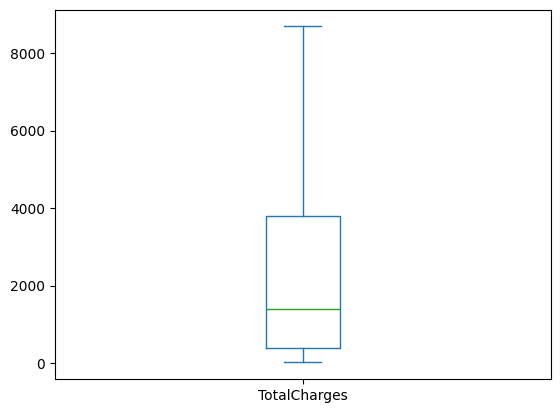

In [91]:
# box plot geral
df_churn_temp['TotalCharges'].plot.box()

TotalCharges    Axes(0.125,0.11;0.775x0.77)
dtype: object

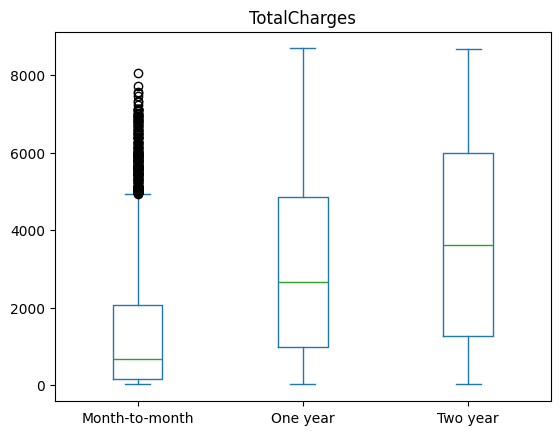

In [92]:
# box plot agrupado por contract
df_churn_temp.plot.box(column='TotalCharges', by='Contract')

In [93]:
#criar dataframe somente com clientes moth to moth
df_churn_month = df_churn_temp[df_churn_temp.Contract=='Month-to-month']

In [94]:
df_churn_month

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,yes
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,yes
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,yes
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,8,Month-to-month,Yes,Electronic check,99.650000000000006,820.500000000000000,Yes,no
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,22,Month-to-month,Yes,Credit card (automatic),89.099999999999994,1949.400000000000091,No,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,38,Month-to-month,Yes,Credit card (automatic),69.500000000000000,2625.250000000000000,No,no
7034,0639-TSIQW,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,67,Month-to-month,Yes,Credit card (automatic),102.950000000000003,6886.250000000000000,Yes,no
7035,8456-QDAVC,Male,0,No,No,Yes,No,Fiber optic,No,No,...,Yes,No,19,Month-to-month,Yes,Bank transfer (automatic),78.700000000000003,1495.099999999999909,No,no
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No,no


<Axes: ylabel='Frequency'>

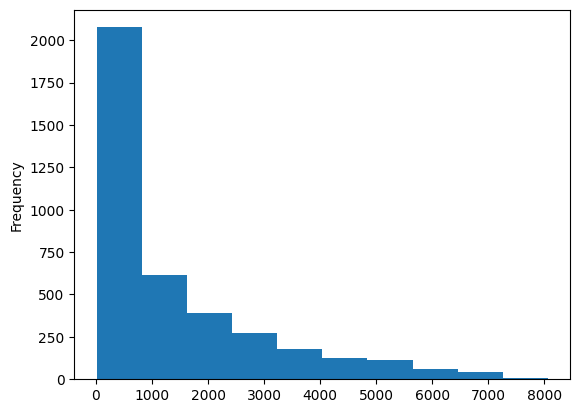

In [95]:
#histograma
df_churn_month.TotalCharges.plot.hist()

In [96]:
#Metodo de tukey - IQR distribuição não normal..

In [87]:
from scipy.stats import zscore

In [88]:
z = zscore(df_churn_temp.TotalCharges)

In [89]:
z

array([nan, nan, nan, ..., nan, nan, nan], shape=(7043,))

### Automatização EDA

### Configurar sweetsviz